In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, log_loss, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv(
    "/home/artemiy/rink_master/rink_master_data/rink_master_47816_wteams.csv"
)
df.head()

,gameID,gameDate,Team,Opponent,homeRoad,gamesPlayed,Win,Loss,Tie,OTLoss,points,pointPct,regulationWins,regulationAndOtWins,shootoutWins,goalsFor,goalsAgainst,goalsForPerGame,goalsAgainstPerGame,powerPlayPct,penaltyKillPct,powerPlayNetPct,penaltyKillNetPct,shotsForPerGame,shotsAgainstPerGame,faceoffWinPct
0,2003020001,2003-10-08,New Jersey Devils,Boston Bruins,1,1,0,0,1,0,1,0.5,0,0,0,3,3,3.0,3.0,0.75,0.75,0.75,0.75,35.0,31.0,0.43
1,2003020003,2003-10-08,Minnesota Wild,Chicago Blackhawks,1,1,0,1,0,0,0,0.0,0,0,0,0,1,0.0,1.0,0.00,1.00,0.00,1.00,33.0,22.0,0.57
2,2003020002,2003-10-08,Dallas Stars,Anaheim Ducks,0,1,1,0,0,0,2,1.0,1,1,0,4,1,4.0,1.0,0.33,0.75,0.33,0.75,22.0,21.0,0.53
3,2003020001,2003-10-08,Boston Bruins,New Jersey Devils,0,1,0,0,1,0,1,0.5,0,0,0,3,3,3.0,3.0,0.25,0.25,0.25,0.25,31.0,35.0,0.57
4,2003020003,2003-10-08,Chicago Blackhawks,Minnesota Wild,0,1,1,0,0,0,2,1.0,1,1,0,1,0,1.0,0.0,0.00,1.00,0.00,1.00,22.0,33.0,0.43


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47816 entries, 0 to 47815
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gameID               47816 non-null  int64  
 1   gameDate             47816 non-null  object 
 2   Team                 47816 non-null  object 
 3   Opponent             47816 non-null  object 
 4   homeRoad             47816 non-null  int64  
 5   gamesPlayed          47816 non-null  int64  
 6   Win                  47816 non-null  int64  
 7   Loss                 47816 non-null  int64  
 8   Tie                  47816 non-null  int64  
 9   OTLoss               47816 non-null  int64  
 10  points               47816 non-null  int64  
 11  pointPct             47816 non-null  float64
 12  regulationWins       47816 non-null  int64  
 13  regulationAndOtWins  47816 non-null  int64  
 14  shootoutWins         47816 non-null  int64  
 15  goalsFor             47816 non-null 

In [5]:
df['gameDate'] = pd.to_datetime(df['gameDate'])

In [6]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

In [7]:
corr_mat = numeric_df.corr()

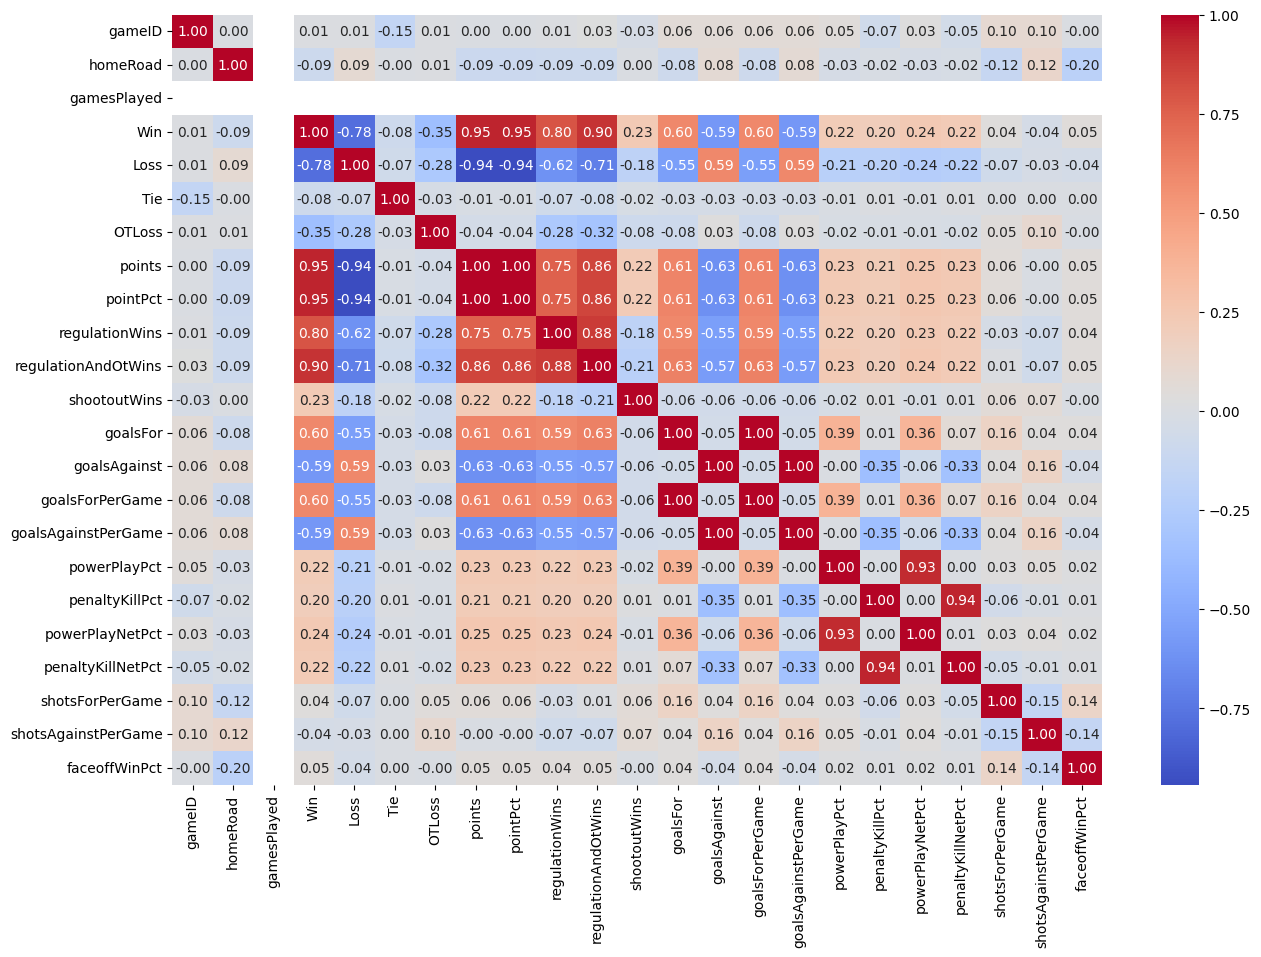

In [8]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# Анализ побед команд с сезона 2003-04 по 2023-24

In [9]:
team_wins = df.groupby('Team')['Win'].sum()

In [10]:
team_wins

Team
Anaheim Ducks            762
Arizona Coyotes          661
Boston Bruins            881
Buffalo Sabres           698
Calgary Flames           791
Carolina Hurricanes      786
Chicago Blackhawks       733
Colorado Avalanche       804
Columbus Blue Jackets    688
Dallas Stars             823
Detroit Red Wings        786
Edmonton Oilers          713
Florida Panthers         747
Los Angeles Kings        756
Minnesota Wild           804
Montréal Canadiens       748
Nashville Predators      841
New Jersey Devils        760
New York Islanders       732
New York Rangers         833
Ottawa Senators          740
Philadelphia Flyers      745
Pittsburgh Penguins      851
San Jose Sharks          804
Seattle Kraken           107
St. Louis Blues          809
Tampa Bay Lightning      845
Toronto Maple Leafs      777
Vancouver Canucks        796
Vegas Golden Knights     312
Washington Capitals      831
Winnipeg Jets            774
Name: Win, dtype: int64

In [11]:
team_wins_df = team_wins.reset_index()
team_wins_df.columns = ["Team", "Total Wins"]
team_wins_df = team_wins_df.sort_values(by="Total Wins", ascending=False)

In [12]:
from matplotlib import colormaps

list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

In [13]:
norm = plt.Normalize(team_wins_df["Total Wins"].min(), team_wins_df["Total Wins"].max())
cmap = plt.get_cmap("plasma") 
colors = cmap(norm(team_wins_df["Total Wins"]))

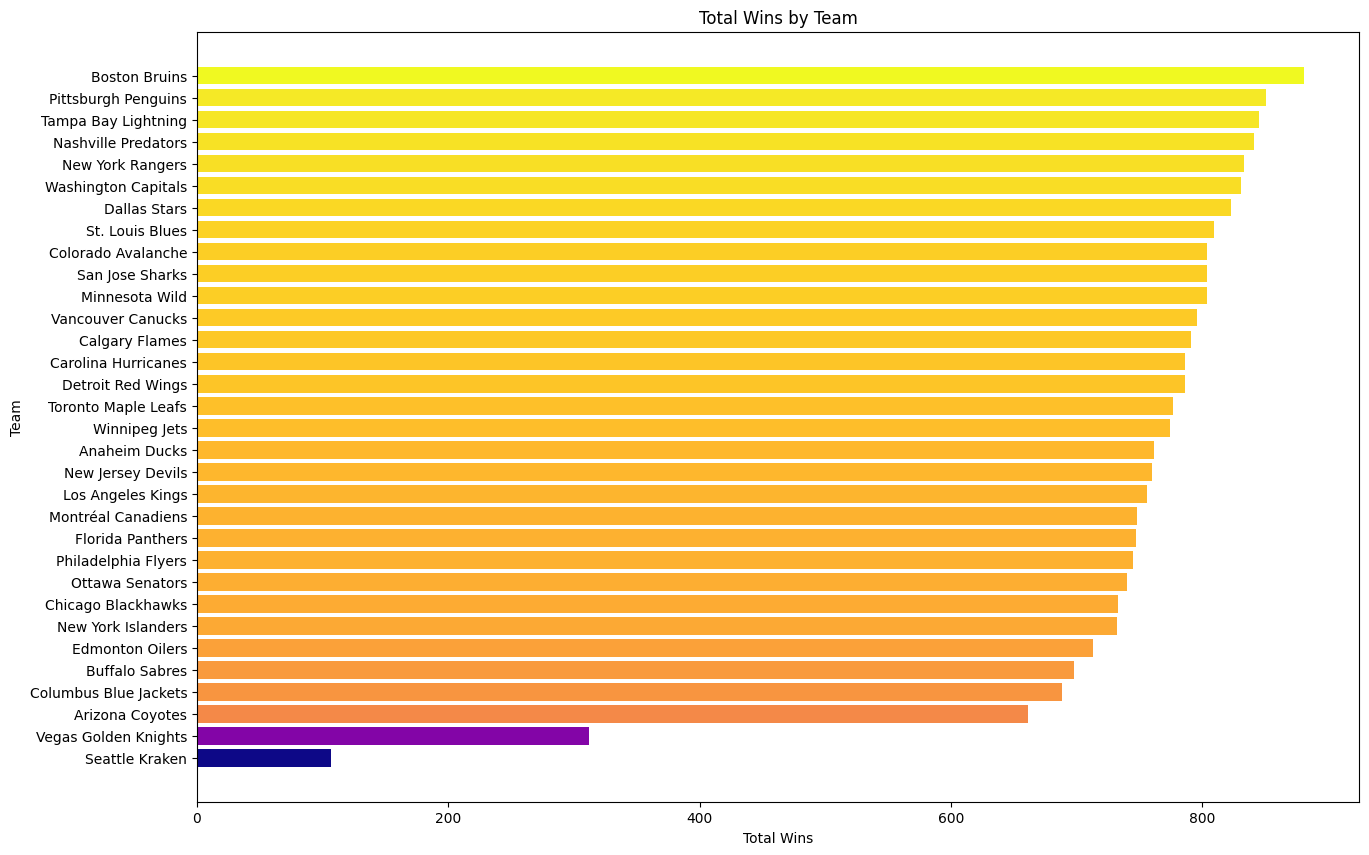

In [14]:
plt.figure(figsize=(15, 10))
plt.barh(team_wins_df["Team"], team_wins_df["Total Wins"], color=colors)
plt.xlabel("Total Wins")
plt.ylabel("Team")
plt.title("Total Wins by Team")
plt.gca().invert_yaxis() 

plt.show()

In [15]:
# Извлечение года и месяца, и создание нового столбца Season
df["Year"] = df["gameDate"].dt.year
df["Month"] = df["gameDate"].dt.month
df["Season"] = df["Year"].astype(str) + "-" + (df["Year"] + 1).astype(str)

In [16]:
wins_df = df[df["Win"] == 1]

# Агрегирование данных по сезону и команде
team_wins_per_season = (
    wins_df.groupby(["Season", "Team"]).size().reset_index(name="Wins")
)

print(team_wins_per_season.head())

      Season             Team  Wins
0  2003-2004    Anaheim Ducks    13
1  2003-2004  Arizona Coyotes    12
2  2003-2004    Boston Bruins    14
3  2003-2004   Buffalo Sabres    15
4  2003-2004   Calgary Flames    19


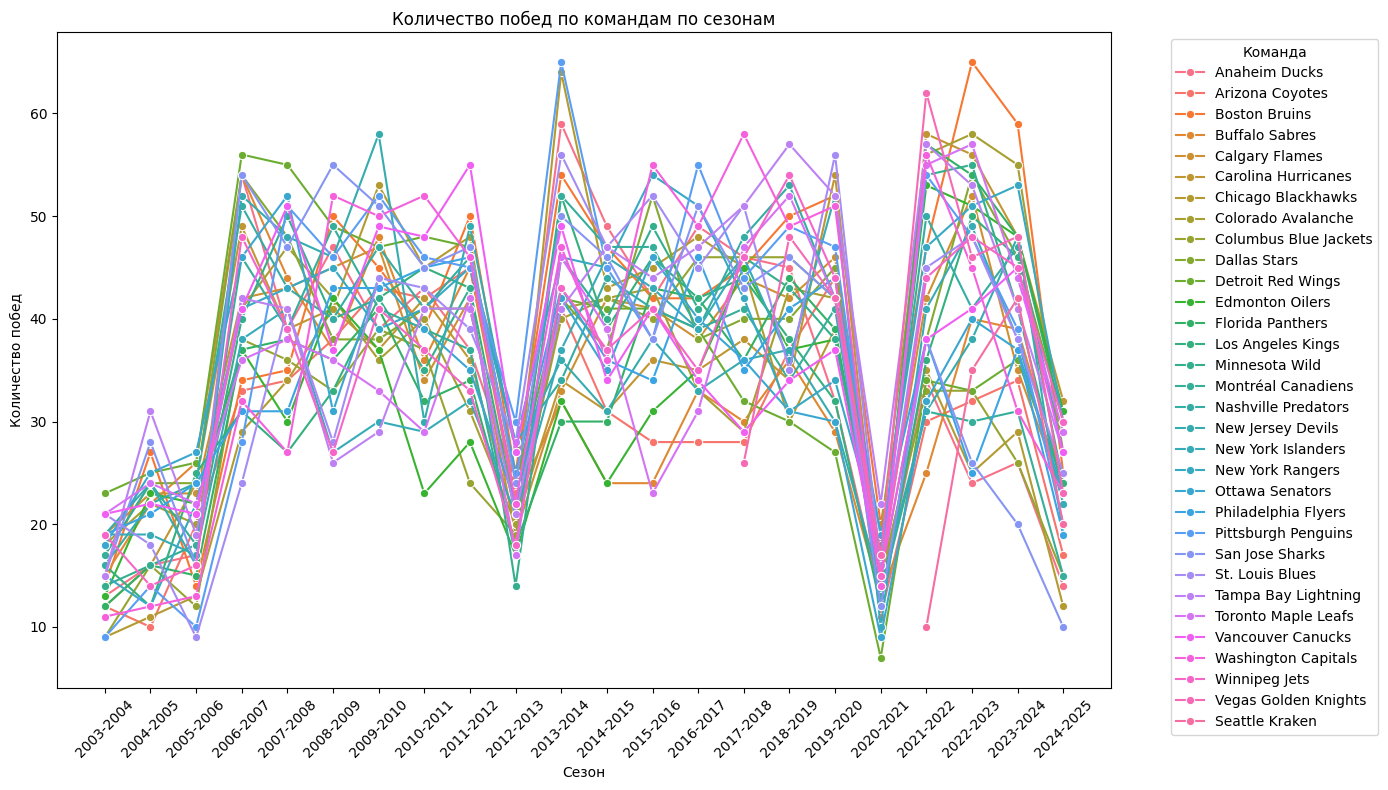

In [17]:
plt.figure(figsize=(14, 8))

sns.lineplot(data=team_wins_per_season, x="Season", y="Wins", hue="Team", marker="o")

plt.title("Количество побед по командам по сезонам")
plt.xlabel("Сезон")
plt.ylabel("Количество побед")
plt.xticks(rotation=45)
plt.legend(title="Команда", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [18]:
df["Season"] = df.apply(
    lambda row: (
        f"{row['Year']}-{row['Year']+1}"
        if row["Month"] >= 10
        else f"{row['Year']-1}-{row['Year']}"
    ),
    axis=1,
)

In [19]:
team_wins_per_season = df.groupby(["Team", "Season"])["Win"].sum().reset_index()

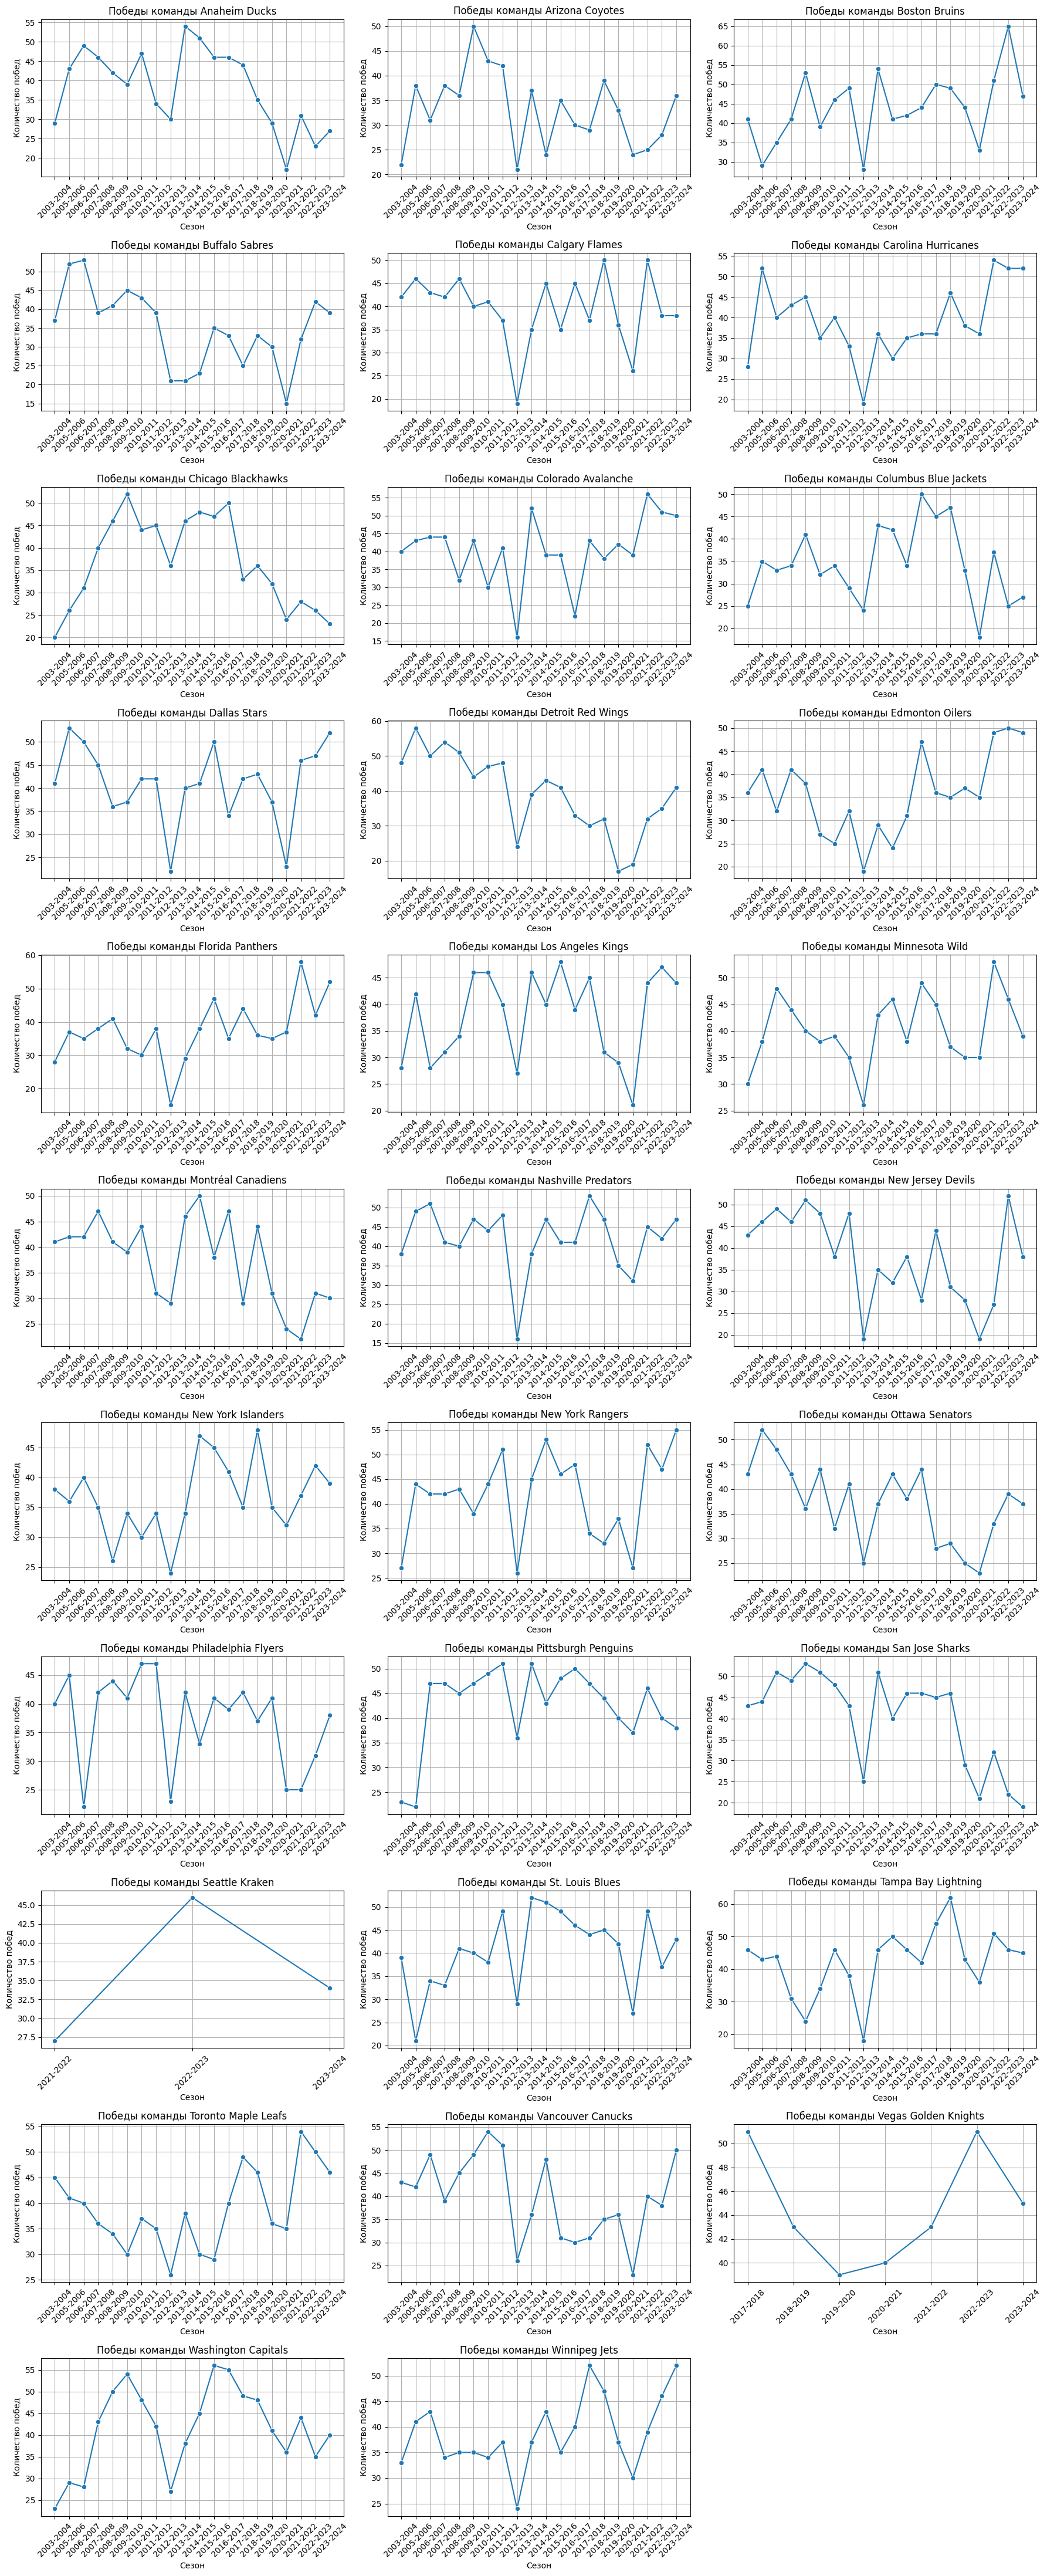

In [20]:
teams = team_wins_per_season["Team"].unique()
num_teams = len(teams)
cols = 3
rows = (num_teams // cols) + (num_teams % cols > 0)

plt.figure(figsize=(18, 4 * rows))

for i, team in enumerate(teams):
    plt.subplot(rows, cols, i + 1)
    team_data = team_wins_per_season[team_wins_per_season["Team"] == team]

    # Построение графика для каждой команды
    sns.lineplot(data=team_data, x="Season", y="Win", marker="o")

    plt.title(f"Победы команды {team}")
    plt.xlabel("Сезон")
    plt.ylabel("Количество побед")
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()

# Домашние vs выездные матчи

In [21]:
home_vs_away = df.groupby("homeRoad")["Win"].sum().reset_index()
home_vs_away.columns = ["HoA", "Wins"]

In [22]:
total_wins = home_vs_away["Wins"].sum()
home_vs_away["Percentage"] = (home_vs_away["Wins"] / total_wins) * 100

/tmp/ipykernel_3346/300033131.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=home_vs_away["HoA"], y=home_vs_away["Wins"], palette=palette)


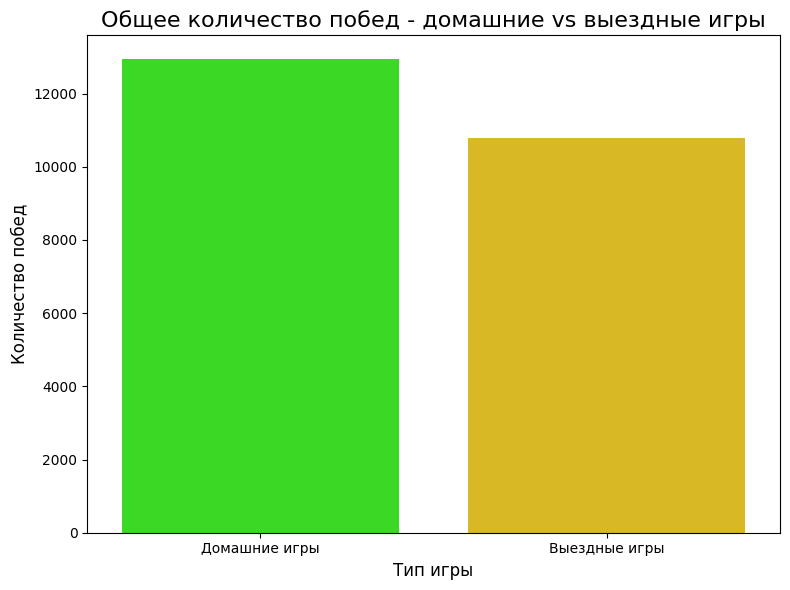

In [23]:
plt.figure(figsize=(8, 6))
palette = ["#24f707", "#f7cb07"]  # Цвета для столбцов

# Построение столбчатой диаграммы
barplot = sns.barplot(x=home_vs_away["HoA"], y=home_vs_away["Wins"], palette=palette)

# Настройка графика
plt.title("Общее количество побед - домашние vs выездные игры", fontsize=16)
plt.xlabel("Тип игры", fontsize=12)
plt.ylabel("Количество побед", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Домашние игры", "Выездные игры"])
plt.gcf().set_size_inches(8, 6)
plt.tight_layout()

# Показ графика
plt.show()

In [24]:
home_wins = home_vs_away[home_vs_away["HoA"] == 0]["Percentage"].values[0]
away_wins = home_vs_away[home_vs_away["HoA"] == 1]["Percentage"].values[0]
increase = home_wins - away_wins

print(f"Процент побед в домашних играх: {home_wins:.2f}%")
print(f"Процент побед в выездных играх: {away_wins:.2f}%")
print(
    f"Домашняя арена увеличивает вероятность победы на: {increase:.2f}% "
)

Процент побед в домашних играх: 54.55%
Процент побед в выездных играх: 45.45%
Домашняя арена увеличивает вероятность победы на: 9.10% 


# Анализ сезонов

In [25]:
print(df['Season'].unique())

['2003-2004' '2005-2006' '2006-2007' '2007-2008' '2008-2009' '2009-2010'
 '2010-2011' '2011-2012' '2012-2013' '2013-2014' '2014-2015' '2015-2016'
 '2016-2017' '2017-2018' '2018-2019' '2019-2020' '2020-2021' '2021-2022'
 '2022-2023' '2023-2024']


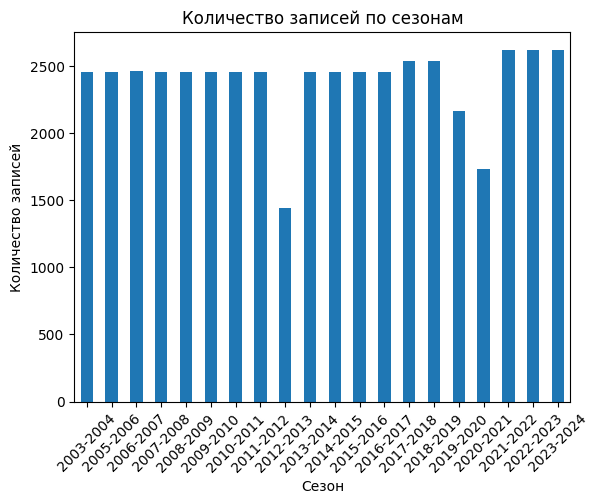

In [26]:
df["Season"].value_counts().sort_index().plot(kind="bar")
plt.title("Количество записей по сезонам")
plt.xlabel("Сезон")
plt.ylabel("Количество записей")
plt.xticks(rotation=45)

plt.show()

## Распределние весов по сезонам 

In [27]:
seasons = df["Season"].unique()
season_weights = {season: i + 1 for i, season in enumerate(sorted(seasons))}

In [28]:
max_season_weight = max(season_weights.values())
min_season_weight = min(season_weights.values())

In [29]:
df["SeasonWeight"] = df["Season"].map(season_weights)

In [30]:
df["NormalizedWeight"] = (df["SeasonWeight"] - min_season_weight) / (
    max_season_weight - min_season_weight
)

In [31]:
df["Weight"] = df.groupby("Season")["NormalizedWeight"].transform("mean")

In [32]:
print("Нормализованные веса для сезонов:")
for season, weight in df.groupby("Season")["Weight"].mean().items():
    print(f"Сезон: {season}, Нормализованный вес: {weight:.4f}")

Нормализованные веса для сезонов:
Сезон: 2003-2004, Нормализованный вес: 0.0000
Сезон: 2005-2006, Нормализованный вес: 0.0526
Сезон: 2006-2007, Нормализованный вес: 0.1053
Сезон: 2007-2008, Нормализованный вес: 0.1579
Сезон: 2008-2009, Нормализованный вес: 0.2105
Сезон: 2009-2010, Нормализованный вес: 0.2632
Сезон: 2010-2011, Нормализованный вес: 0.3158
Сезон: 2011-2012, Нормализованный вес: 0.3684
Сезон: 2012-2013, Нормализованный вес: 0.4211
Сезон: 2013-2014, Нормализованный вес: 0.4737
Сезон: 2014-2015, Нормализованный вес: 0.5263
Сезон: 2015-2016, Нормализованный вес: 0.5789
Сезон: 2016-2017, Нормализованный вес: 0.6316
Сезон: 2017-2018, Нормализованный вес: 0.6842
Сезон: 2018-2019, Нормализованный вес: 0.7368
Сезон: 2019-2020, Нормализованный вес: 0.7895
Сезон: 2020-2021, Нормализованный вес: 0.8421
Сезон: 2021-2022, Нормализованный вес: 0.8947
Сезон: 2022-2023, Нормализованный вес: 0.9474
Сезон: 2023-2024, Нормализованный вес: 1.0000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47816 entries, 0 to 47815
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   gameID               47816 non-null  int64         
 1   gameDate             47816 non-null  datetime64[ns]
 2   Team                 47816 non-null  object        
 3   Opponent             47816 non-null  object        
 4   homeRoad             47816 non-null  int64         
 5   gamesPlayed          47816 non-null  int64         
 6   Win                  47816 non-null  int64         
 7   Loss                 47816 non-null  int64         
 8   Tie                  47816 non-null  int64         
 9   OTLoss               47816 non-null  int64         
 10  points               47816 non-null  int64         
 11  pointPct             47816 non-null  float64       
 12  regulationWins       47816 non-null  int64         
 13  regulationAndOtWins  47816 non-

In [34]:
df = df.rename(columns={'Weight':'Weights'})

In [35]:
df = df.drop(["NormalizedWeight", "SeasonWeight"], axis=1)

# Анализ овертаймов и буллитов

In [36]:
non_zero_counts = {
    "Tie": df["Tie"].astype(bool).sum(),
    "OTLoss": df["OTLoss"].astype(bool).sum(),
    "regulationWins": df["regulationWins"].astype(bool).sum(),
    "regulationAndOtWins": df["regulationAndOtWins"].astype(bool).sum(),
    "shootoutWins": df["shootoutWins"].astype(bool).sum(),
}

In [37]:
for column, count in non_zero_counts.items():
    print(f"{column}: {count} ненулевых значений")

Tie: 340 ненулевых значений
OTLoss: 5371 ненулевых значений
regulationWins: 18364 ненулевых значений
regulationAndOtWins: 21329 ненулевых значений
shootoutWins: 2409 ненулевых значений


In [38]:
df.head()

,gameID,gameDate,Team,Opponent,homeRoad,gamesPlayed,Win,Loss,Tie,OTLoss,points,pointPct,regulationWins,regulationAndOtWins,shootoutWins,goalsFor,goalsAgainst,goalsForPerGame,goalsAgainstPerGame,powerPlayPct,penaltyKillPct,powerPlayNetPct,penaltyKillNetPct,shotsForPerGame,shotsAgainstPerGame,faceoffWinPct,Year,Month,Season,Weights
0,2003020001,2003-10-08,New Jersey Devils,Boston Bruins,1,1,0,0,1,0,1,0.5,0,0,0,3,3,3.0,3.0,0.75,0.75,0.75,0.75,35.0,31.0,0.43,2003,10,2003-2004,0.0
1,2003020003,2003-10-08,Minnesota Wild,Chicago Blackhawks,1,1,0,1,0,0,0,0.0,0,0,0,0,1,0.0,1.0,0.00,1.00,0.00,1.00,33.0,22.0,0.57,2003,10,2003-2004,0.0
2,2003020002,2003-10-08,Dallas Stars,Anaheim Ducks,0,1,1,0,0,0,2,1.0,1,1,0,4,1,4.0,1.0,0.33,0.75,0.33,0.75,22.0,21.0,0.53,2003,10,2003-2004,0.0
3,2003020001,2003-10-08,Boston Bruins,New Jersey Devils,0,1,0,0,1,0,1,0.5,0,0,0,3,3,3.0,3.0,0.25,0.25,0.25,0.25,31.0,35.0,0.57,2003,10,2003-2004,0.0
4,2003020003,2003-10-08,Chicago Blackhawks,Minnesota Wild,0,1,1,0,0,0,2,1.0,1,1,0,1,0,1.0,0.0,0.00,1.00,0.00,1.00,22.0,33.0,0.43,2003,10,2003-2004,0.0


In [39]:
count_special_cases = df[
    (df["Win"] == 0)
    & (df["Loss"] == 0)
    & (
        (df["Tie"] != 0)
        | (df["OTLoss"] != 0)
        | (df["regulationWins"] != 0)
        | (df["regulationAndOtWins"] != 0)
        | (df["shootoutWins"] != 0)
    )
].shape[0]

print(
    f"Строки, где Win и Loss равны 0, но Tie, OTLoss, regulationWins или regulationAndOtWins не равны 0: {count_special_cases}"
)

Строки, где Win и Loss равны 0, но Tie, OTLoss, regulationWins или regulationAndOtWins не равны 0: 5711


In [40]:
def determine_result(row):
    if (
        row["Win"] != 0
        or row["regulationWins"] != 0
        or row["regulationAndOtWins"] != 0
        or row["shootoutWins"] != 0
    ):
        return 1  # Победа
    elif row["Loss"] != 0 or row["OTLoss"] != 0:
        return 0  # Поражение
    else:
        return -1  # Неопределено

In [41]:
df["Result"] = df.apply(determine_result, axis=1)

In [42]:
undefined_results = df[df["Result"] == -1].shape[0]
print(f"Количество строк с неопределенными результатами: {undefined_results}")

Количество строк с неопределенными результатами: 340


In [43]:
df = df[df["Result"] != -1]

In [44]:
df[df['Tie']!= 0]

,gameID,gameDate,Team,Opponent,homeRoad,gamesPlayed,Win,Loss,Tie,OTLoss,points,pointPct,regulationWins,regulationAndOtWins,shootoutWins,goalsFor,goalsAgainst,goalsForPerGame,goalsAgainstPerGame,powerPlayPct,penaltyKillPct,powerPlayNetPct,penaltyKillNetPct,shotsForPerGame,shotsAgainstPerGame,faceoffWinPct,Year,Month,Season,Weights,Result


In [45]:
df["NonRegulationTime"] = df.apply(
    lambda row: row["OTLoss"] != 0 or row["shootoutWins"] != 0, axis=1
)

In [46]:
games_by_season = (
    df.groupby(["Season", "NonRegulationTime"]).size().unstack(fill_value=0)
)

In [47]:
games_by_season.columns = ["RegulationTime", "NonRegulationTime"]

In [48]:
games_by_season["TotalGames"] = (
    games_by_season["RegulationTime"] + games_by_season["NonRegulationTime"]
)

In [49]:
games_by_season["PercentNonRegulation"] = (
    games_by_season["NonRegulationTime"] / games_by_season["TotalGames"]
) * 100

In [50]:
print(games_by_season)

           RegulationTime  NonRegulationTime  TotalGames  PercentNonRegulation
Season                                                                        
2003-2004            1975                145        2120              6.839623
2005-2006            2034                426        2460             17.317073
2006-2007            2019                445        2464             18.060065
2007-2008            2028                428        2456             17.426710
2008-2009            2019                441        2460             17.926829
2009-2010            1975                485        2460             19.715447
2010-2011            2014                446        2460             18.130081
2011-2012            1979                481        2460             19.552846
2012-2013            1181                259        1440             17.986111
2013-2014            1975                485        2460             19.715447
2014-2015            1984                476        

In [51]:
mean_nonregulation = games_by_season["PercentNonRegulation"].mean().round(2)
print(
    f"Срений процент встреч, завершившихся не в основное время с 2003-04 по 2023-24 - {mean_nonregulation}%"
)

Срений процент встреч, завершившихся не в основное время с 2003-04 по 2023-24 - 16.35%


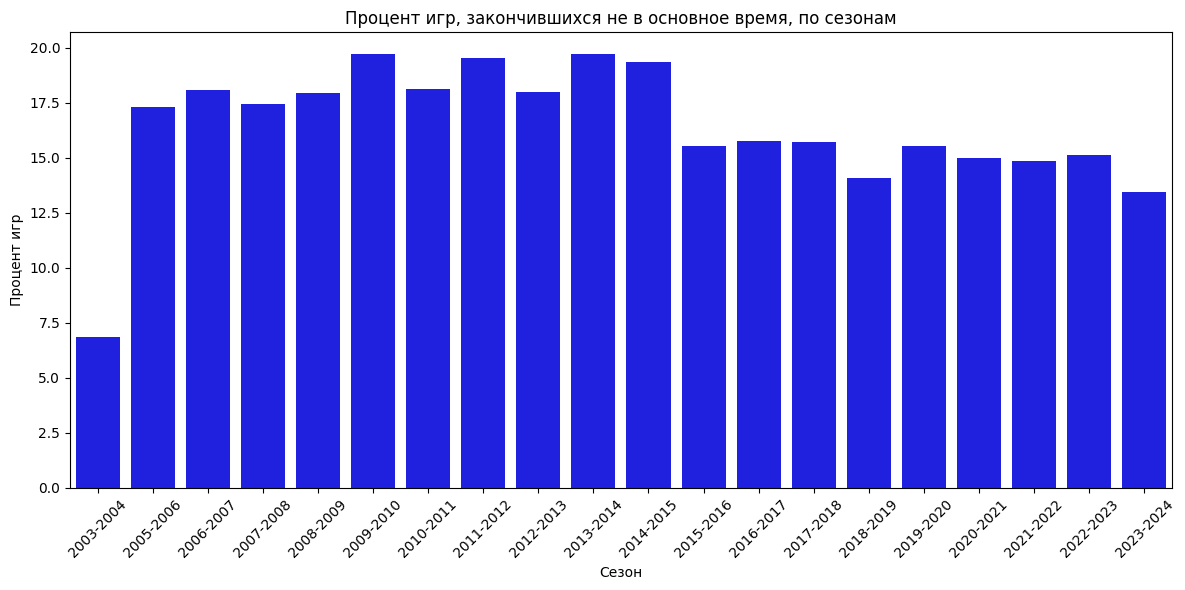

In [52]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=games_by_season.reset_index(),
    x="Season",
    y="PercentNonRegulation",
    color="blue",
)

plt.title("Процент игр, закончившихся не в основное время, по сезонам")
plt.xlabel("Сезон")
plt.ylabel("Процент игр")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [53]:
df['Tie'].value_counts()

Tie
0    47476
Name: count, dtype: int64

# Обучение

In [54]:
fullname_to_code = {
    "New Jersey Devils": 1,
    "New York Islanders": 2,
    "New York Rangers": 3,
    "Philadelphia Flyers": 4,
    "Pittsburgh Penguins": 5,
    "Boston Bruins": 6,
    "Buffalo Sabres": 7,
    "Montréal Canadiens": 8,
    "Ottawa Senators": 9,
    "Toronto Maple Leafs": 10,
    "Carolina Hurricanes": 11,
    "Florida Panthers": 12,
    "Tampa Bay Lightning": 13,
    "Washington Capitals": 14,
    "Chicago Blackhawks": 15,
    "Detroit Red Wings": 16,
    "Nashville Predators": 17,
    "St. Louis Blues": 18,
    "Calgary Flames": 19,
    "Colorado Avalanche": 20,
    "Edmonton Oilers": 21,
    "Vancouver Canucks": 22,
    "Anaheim Ducks": 23,
    "Dallas Stars": 24,
    "Los Angeles Kings": 25,
    "San Jose Sharks": 26,
    "Columbus Blue Jackets": 27,
    "Minnesota Wild": 28,
    "Winnipeg Jets": 29,
    "Arizona Coyotes": 30,
    "Vegas Golden Knights": 31,
    "Seattle Kraken": 32,
}

In [55]:
df["Team"] = df["Team"].map(fullname_to_code)
df["Opponent"] = df["Opponent"].map(fullname_to_code)

In [56]:
# encoder = OneHotEncoder()
# encoded_teams = encoder.fit_transform(df[["Team", "Opponent"]]).toarray()
# feature_names = encoder.get_feature_names_out(["Team", "Opponent"])
# encoded_teams_df = pd.DataFrame(encoded_teams, columns=feature_names)

In [83]:
df.to_csv('data_wencoded_teams47k.csv')

In [ ]:
df.to

In [57]:
# combined = pd.concat([df, encoded_teams_df], axis=1)

In [58]:
# combined = combined[["gameDate", "homeRoad"] + list(feature_names) + ["Weights", "Result"]]

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47476 entries, 1 to 47815
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   gameID               47476 non-null  int64         
 1   gameDate             47476 non-null  datetime64[ns]
 2   Team                 47476 non-null  int64         
 3   Opponent             47476 non-null  int64         
 4   homeRoad             47476 non-null  int64         
 5   gamesPlayed          47476 non-null  int64         
 6   Win                  47476 non-null  int64         
 7   Loss                 47476 non-null  int64         
 8   Tie                  47476 non-null  int64         
 9   OTLoss               47476 non-null  int64         
 10  points               47476 non-null  int64         
 11  pointPct             47476 non-null  float64       
 12  regulationWins       47476 non-null  int64         
 13  regulationAndOtWins  47476 non-null 

In [60]:
df.columns.to_list()

['gameID',
 'gameDate',
 'Team',
 'Opponent',
 'homeRoad',
 'gamesPlayed',
 'Win',
 'Loss',
 'Tie',
 'OTLoss',
 'points',
 'pointPct',
 'regulationWins',
 'regulationAndOtWins',
 'shootoutWins',
 'goalsFor',
 'goalsAgainst',
 'goalsForPerGame',
 'goalsAgainstPerGame',
 'powerPlayPct',
 'penaltyKillPct',
 'powerPlayNetPct',
 'penaltyKillNetPct',
 'shotsForPerGame',
 'shotsAgainstPerGame',
 'faceoffWinPct',
 'Year',
 'Month',
 'Season',
 'Weights',
 'Result',
 'NonRegulationTime']

In [61]:
train = df[df["gameDate"] < "2023-10-10"]
test = df[df["gameDate"] >= "2023-10-10"]

In [62]:
train.shape

(44852, 32)

In [63]:
test.shape

(2624, 32)

In [64]:
X_train = train.drop(
    columns=[
        "Result",
        "gameDate",
        "gameID",
        "gameDate",
        "gamesPlayed",
        "Win",
        "Loss",
        "Tie",
        "OTLoss",
        "points",
        "pointPct",
        "regulationWins",
        "regulationAndOtWins",
        "shootoutWins",
        "goalsFor",
        "goalsAgainst",
        "goalsForPerGame",
        "goalsAgainstPerGame",
        "powerPlayPct",
        "penaltyKillPct",
        "powerPlayNetPct",
        "penaltyKillNetPct",
        "shotsForPerGame",
        "shotsAgainstPerGame",
        "faceoffWinPct",
        "Year",
        "Month",
        "Season",
        "Result",
        "NonRegulationTime",
        ],
)
y_train = train["Result"]
X_test = test.drop(
    columns=[
        "Result",
        "gameDate",
        "gameID",
        "gameDate",
        "gamesPlayed",
        "Win",
        "Loss",
        "Tie",
        "OTLoss",
        "points",
        "pointPct",
        "regulationWins",
        "regulationAndOtWins",
        "shootoutWins",
        "goalsFor",
        "goalsAgainst",
        "goalsForPerGame",
        "goalsAgainstPerGame",
        "powerPlayPct",
        "penaltyKillPct",
        "powerPlayNetPct",
        "penaltyKillNetPct",
        "shotsForPerGame",
        "shotsAgainstPerGame",
        "faceoffWinPct",
        "Year",
        "Month",
        "Season",
        "Result",
        "NonRegulationTime",
    ],
)
y_test = test["Result"]

In [65]:
X_train

,Team,Opponent,homeRoad,Weights
1,28,15,1,0.000000
2,24,23,0,0.000000
4,15,28,0,0.000000
5,23,24,1,0.000000
6,26,21,1,0.000000
...,...,...,...,...
45187,16,13,1,0.947368
45188,17,20,0,0.947368
45189,20,17,1,0.947368
45190,7,27,1,0.947368


In [66]:
X_test

,Team,Opponent,homeRoad,Weights
45192,5,15,0,1.0
45193,13,17,0,1.0
45194,15,5,1,1.0
45195,17,13,1,1.0
45196,31,32,0,1.0
...,...,...,...,...
47811,26,19,1,1.0
47812,28,32,0,1.0
47813,29,22,0,1.0
47814,31,23,0,1.0


In [67]:
X_train.isna().sum()
X_test.isna().sum()

Team        0
Opponent    0
homeRoad    0
Weights     0
dtype: int64

In [68]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

Team        0
Opponent    0
homeRoad    0
Weights     0
dtype: int64
Team        0
Opponent    0
homeRoad    0
Weights     0
dtype: int64


In [69]:
# X_train = X_train.dropna()
# y_train = y_train[X_train.index]  
# X_test = X_test.dropna()
# y_test = y_test[X_test.index] 

In [70]:
lr = LogisticRegression(max_iter=1000, random_state=1)
lr.fit(X_train, y_train)
preds_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, preds_lr)
print(f"Точность предсказаний (Logistic Regression): {accuracy_lr * 100:.2f}%")

Точность предсказаний (Logistic Regression): 54.12%


In [71]:
preds_lr_proba = lr.predict_proba(X_test)[:, 1]

In [72]:
accuracy_lr = accuracy_score(y_test, preds_lr)
precision_lr = precision_score(y_test, preds_lr)
recall_lr = recall_score(y_test, preds_lr)
f1_lr = f1_score(y_test, preds_lr)
roc_auc_lr = roc_auc_score(y_test, preds_lr_proba)
log_loss_lr = log_loss(y_test, preds_lr_proba)

In [73]:
print(f"Точность предсказаний (Logistic Regression): {accuracy_lr * 100:.2f}%")
print(f"Precision: {precision_lr:.2f}")
print(f"Recall: {recall_lr:.2f}")
print(f"F1-Score: {f1_lr:.2f}")
print(f"ROC-AUC: {roc_auc_lr:.2f}")
print(f"Log-Loss: {log_loss_lr:.2f}")

Точность предсказаний (Logistic Regression): 54.12%
Precision: 0.54
Recall: 0.54
F1-Score: 0.54
ROC-AUC: 0.55
Log-Loss: 0.69


In [74]:
# import numpy as np


# # Применение экспоненциального сглаживания на основе весов
# def exponential_smoothing(data, weights):
#     smoothed = np.zeros_like(data)
#     smoothed[0] = data[0]
#     for t in range(1, len(data)):
#         smoothed[t] = (weights[t] * data[t]) + ((1 - weights[t]) * smoothed[t - 1])
#     return smoothed


# smoothed_data = exponential_smoothing(
#     X_train["goalsFor"].values, train["Weights"].values
# )
# X_train["smoothed_goalsFor"] = smoothed_data

In [75]:
rf = RandomForestClassifier(n_estimators=100, random_state=1, min_samples_split=10)
rf.fit(X_train, y_train, sample_weight=train["Weights"])
preds_rf = rf.predict(X_test)
preds_rf_proba = rf.predict_proba(X_test)[:, 1]

In [76]:
accuracy_rf = accuracy_score(y_test, preds_rf)
precision_rf = precision_score(y_test, preds_rf)
recall_rf = recall_score(y_test, preds_rf)
f1_rf = f1_score(y_test, preds_rf)
roc_auc_rf = roc_auc_score(y_test, preds_rf_proba)
log_loss_rf = log_loss(y_test, preds_rf_proba)

In [77]:
print(f"Точность предсказаний (Random Forest): {accuracy_rf * 100:.2f}%")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}")
print(f"ROC-AUC: {roc_auc_rf:.2f}")
print(f"Log-Loss: {log_loss_rf:.2f}")

Точность предсказаний (Random Forest): 54.84%
Precision: 0.55
Recall: 0.55
F1-Score: 0.55
ROC-AUC: 0.58
Log-Loss: 0.73


In [78]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [79]:
smote = SMOTE(random_state=1)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [80]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

In [81]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 5],
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=1), param_grid, cv=5, scoring="f1"
)
grid_search.fit(X_train_scaled, y_train_balanced)

KeyboardInterrupt: 

In [ ]:
best_rf = grid_search.best_estimator_

In [ ]:
preds_rf = best_rf.predict(X_test_scaled)
preds_rf_proba = best_rf.predict_proba(X_test_scaled)[:, 1]

In [ ]:
accuracy_rf = accuracy_score(y_test, preds_rf)
precision_rf = precision_score(y_test, preds_rf)
recall_rf = recall_score(y_test, preds_rf)
f1_rf = f1_score(y_test, preds_rf)
roc_auc_rf = roc_auc_score(y_test, preds_rf_proba)
log_loss_rf = log_loss(y_test, preds_rf_proba)

In [ ]:
print(f"Точность предсказаний (Random Forest с весами): {accuracy_rf * 100:.2f}%")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}")
print(f"ROC-AUC: {roc_auc_rf:.2f}")
print(f"Log-Loss: {log_loss_rf:.2f}")

Точность предсказаний (Random Forest с весами): 55.72%
Precision: 0.56
Recall: 0.56
F1-Score: 0.56
ROC-AUC: 0.58
Log-Loss: 0.68


In [ ]:
import joblib

In [ ]:
joblib.dump(lr, "logistic_regression_model.pkl")

['logistic_regression_model.pkl']

In [ ]:
joblib.dump(best_rf, "random_fores_wgridsearch.pkl")

['random_fores_wgridsearch.pkl']

In [ ]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [ ]:
xgb_model = XGBClassifier(
    use_label_encoder=False, eval_metric="logloss", random_state=1
)
xgb_model.fit(X_train, y_train, sample_weight=train["Weights"])

[22:14:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_preds = xgb_model.predict(X_test)
xgb_proba = xgb_model.predict_proba(X_test)

In [ ]:
xgb_accuracy = accuracy_score(y_test, xgb_preds)
xgb_precision = precision_score(y_test, xgb_preds)
xgb_recall = recall_score(y_test, xgb_preds)
xgb_f1 = f1_score(y_test, xgb_preds)
xgb_roc_auc = roc_auc_score(y_test, xgb_proba[:, 1])
xgb_log_loss = log_loss(y_test, xgb_proba)

In [ ]:
print(f"Точность предсказаний (XGBoost): {xgb_accuracy * 100:.2f}%")
print(f"Precision: {xgb_precision:.2f}")
print(f"Recall: {xgb_recall:.2f}")
print(f"F1-Score: {xgb_f1:.2f}")
print(f"ROC-AUC: {xgb_roc_auc:.2f}")
print(f"Log-Loss: {xgb_log_loss:.2f}")

Точность предсказаний (XGBoost): 57.01%
Precision: 0.57
Recall: 0.57
F1-Score: 0.57
ROC-AUC: 0.60
Log-Loss: 0.72


In [ ]:
cat_model = CatBoostClassifier(verbose=0, random_state=1)
cat_model.fit(X_train, y_train, sample_weight=train["Weights"])

In [ ]:
cat_preds = cat_model.predict(X_test)
cat_proba = cat_model.predict_proba(X_test)

In [ ]:
cat_accuracy = accuracy_score(y_test, cat_preds)
cat_precision = precision_score(y_test, cat_preds)
cat_recall = recall_score(y_test, cat_preds)
cat_f1 = f1_score(y_test, cat_preds)
cat_roc_auc = roc_auc_score(y_test, cat_proba[:, 1])
cat_log_loss = log_loss(y_test, cat_proba)

In [ ]:
print(f"Точность предсказаний (CatBoost): {cat_accuracy * 100:.2f}%")
print(f"Precision: {cat_precision:.2f}")
print(f"Recall: {cat_recall:.2f}")
print(f"F1-Score: {cat_f1:.2f}")
print(f"ROC-AUC: {cat_roc_auc:.2f}")
print(f"Log-Loss: {cat_log_loss:.2f}")

Точность предсказаний (CatBoost): 57.51%
Precision: 0.57
Recall: 0.58
F1-Score: 0.58
ROC-AUC: 0.61
Log-Loss: 0.69
